# Validating MARLEY Generation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readHepevt(filename, EvtNo):
    particles = []
    with open(filename, 'r') as f:
        while True:
            header = f.readline()
            if not header:
                break  # End of file
            parts = header.strip().split()
            if len(parts) < 2:
                continue
            n_particles = int(parts[1])
            event_id = EvtNo

            for _ in range(n_particles):
                line = f.readline()
                data = line.strip().split()
                if len(data) < 15:
                    continue
                particle = {
                    "NEVHEP": event_id,
                    "ISTHEP": int(data[0]),
                    "IDHEP": int(data[1]),
                    "JMOHEP1": int(data[2]),
                    "JMOHEP2": int(data[3]),
                    "JDAHEP1": int(data[4]),
                    "JDAHEP2": int(data[5]),
                    "PHEP1": float(data[6]),
                    "PHEP2": float(data[7]),
                    "PHEP3": float(data[8]),
                    "PHEP4": float(data[9]),
                    "PHEP5": float(data[10]),
                    "VHEP1": float(data[11]),
                    "VHEP2": float(data[12]),
                    "VHEP3": float(data[13]),
                    "VHEP4": float(data[14]),
                }
                particles.append(particle)

            EvtNo += 1
    return pd.DataFrame(particles)


## Read in the input files

Fermi transitions vs Gamow-Teller (GT) transitions

In [3]:
# Fermi
FermiFile = '/Users/yuntse/data/supernova/gkvm/marley_fermi/nueArCC_garching_nh_fermi_nxpyDir_00.hepevt'

In [4]:
FermiEvents = readHepevt( FermiFile, 0)
FermiEvents

,NEVHEP,ISTHEP,IDHEP,JMOHEP1,JMOHEP2,JDAHEP1,JDAHEP2,PHEP1,PHEP2,PHEP3,PHEP4,PHEP5,VHEP1,VHEP2,VHEP3,VHEP4
0,0,3,12,0,0,0,0,-0.019539,0.019539,0.000000,0.027632,0.000000e+00,0.0,0.0,0.0,0.0
1,0,3,1000180400,0,0,0,0,0.000000,0.000000,0.000000,37.224723,3.722472e+01,0.0,0.0,0.0,0.0
2,0,11,0,0,1,0,0,0.000000,0.000000,0.000000,4.383700,5.404115e-20,0.0,0.0,0.0,0.0
3,0,1,11,0,0,0,0,-0.002033,0.021815,-0.003848,0.022251,5.109989e-04,0.0,0.0,0.0,0.0
4,0,1,1000190400,0,0,0,0,-0.015574,-0.004246,0.002448,37.225720,3.722572e+01,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88424,9999,1,1000190400,0,0,0,0,-0.012507,0.028774,-0.029323,37.225741,3.722572e+01,0.0,0.0,0.0,0.0
88425,9999,1,22,0,0,0,0,0.001617,0.001045,-0.000824,0.002095,0.000000e+00,0.0,0.0,0.0,0.0
88426,9999,1,22,0,0,0,0,0.000645,0.000025,-0.000022,0.000646,0.000000e+00,0.0,0.0,0.0,0.0
88427,9999,1,22,0,0,0,0,0.001304,-0.000790,0.000525,0.001612,0.000000e+00,0.0,0.0,0.0,0.0


In [5]:
# GT
GTFile = '/Users/yuntse/data/supernova/gkvm/marley_gt/nueArCC_garching_nh_gt_nxpyDir_00.hepevt'

In [6]:
GTEvents = readHepevt( GTFile, 0)
GTEvents

,NEVHEP,ISTHEP,IDHEP,JMOHEP1,JMOHEP2,JDAHEP1,JDAHEP2,PHEP1,PHEP2,PHEP3,PHEP4,PHEP5,VHEP1,VHEP2,VHEP3,VHEP4
0,0,3,12,0,0,0,0,-0.056559,0.056559,0.000000,0.079986,0.000000e+00,0.0,0.0,0.0,0.0
1,0,3,1000180400,0,0,0,0,0.000000,0.000000,0.000000,37.224723,3.722472e+01,0.0,0.0,0.0,0.0
2,0,11,0,2,1,0,0,0.000000,0.000000,0.000000,14.473070,1.678846e-19,0.0,0.0,0.0,0.0
3,0,1,11,0,0,0,0,0.032386,0.044242,0.033770,0.064396,5.109989e-04,0.0,0.0,0.0,0.0
4,0,1,1000170360,0,0,0,0,-0.188501,0.101260,-0.162340,33.505852,3.350478e+01,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78010,9999,1,11,0,0,0,0,0.043459,-0.056794,-0.000899,0.071521,5.109989e-04,0.0,0.0,0.0,0.0
78011,9999,1,1000190400,0,0,0,0,-0.097125,0.108010,0.001746,37.225999,3.722572e+01,0.0,0.0,0.0,0.0
78012,9999,1,22,0,0,0,0,0.000437,0.000449,-0.000157,0.000646,0.000000e+00,0.0,0.0,0.0,0.0
78013,9999,1,22,0,0,0,0,0.000124,0.001445,-0.000717,0.001618,0.000000e+00,0.0,0.0,0.0,0.0


## $\gamma$ Multiplicity

In [7]:
FermiGammaMulti = FermiEvents[(FermiEvents.ISTHEP==1)&(FermiEvents.IDHEP==22)].groupby('NEVHEP').size().reset_index(name='gMultiplicity')

In [8]:
FermiGammaMulti['gMultiplicity'].min(), FermiGammaMulti['gMultiplicity'].max()

(2, 5)

In [9]:
GTGammaMulti = GTEvents[(GTEvents.ISTHEP==1)&(GTEvents.IDHEP==22)].groupby('NEVHEP').size().reset_index(name='gMultiplicity')

In [10]:
GTGammaMulti['gMultiplicity'].min(), GTGammaMulti['gMultiplicity'].max()

(1, 6)

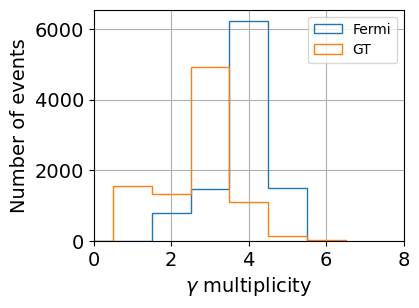

In [11]:
fig, ax = plt.subplots( figsize = (4, 3) )  

nMulti = max(FermiGammaMulti['gMultiplicity'].max(), GTGammaMulti['gMultiplicity'].max())
ax.hist(FermiGammaMulti['gMultiplicity'], bins = range(0, nMulti+2), align='left', histtype = 'step', label = 'Fermi')
ax.hist(GTGammaMulti['gMultiplicity'], bins = range(0, nMulti+2), align='left', histtype = 'step', label = 'GT')
ax.set_xlabel( r'$\gamma$ multiplicity', fontsize = 14 )
ax.set_ylabel( r'Number of events', fontsize = 14 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, nMulti+2] )
ax.legend()

ax.grid(":")

## Electron energy

In [12]:
FermiE = FermiEvents[(FermiEvents.ISTHEP==1)&(FermiEvents.IDHEP==11)].copy()
FermiE

,NEVHEP,ISTHEP,IDHEP,JMOHEP1,JMOHEP2,JDAHEP1,JDAHEP2,PHEP1,PHEP2,PHEP3,PHEP4,PHEP5,VHEP1,VHEP2,VHEP3,VHEP4
3,0,1,11,0,0,0,0,-0.002033,0.021815,-0.003848,0.022251,0.000511,0.0,0.0,0.0,0.0
12,1,1,11,0,0,0,0,-0.012400,0.004657,-0.013614,0.019001,0.000511,0.0,0.0,0.0,0.0
21,2,1,11,0,0,0,0,0.003520,0.015179,-0.004029,0.016102,0.000511,0.0,0.0,0.0,0.0
29,3,1,11,0,0,0,0,0.010008,0.008721,0.009394,0.016270,0.000511,0.0,0.0,0.0,0.0
38,4,1,11,0,0,0,0,-0.025174,0.026370,-0.007538,0.037232,0.000511,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88388,9995,1,11,0,0,0,0,0.001664,-0.008206,0.003382,0.009044,0.000511,0.0,0.0,0.0,0.0
88397,9996,1,11,0,0,0,0,-0.028075,0.045182,-0.052566,0.074787,0.000511,0.0,0.0,0.0,0.0
88406,9997,1,11,0,0,0,0,-0.001340,0.029530,0.005334,0.030042,0.000511,0.0,0.0,0.0,0.0
88415,9998,1,11,0,0,0,0,-0.014156,0.024560,-0.004093,0.028646,0.000511,0.0,0.0,0.0,0.0


In [13]:
GTE = GTEvents[(GTEvents.ISTHEP==1)&(GTEvents.IDHEP==11)].copy()

In [14]:
FermiE.PHEP4.max(), GTE.PHEP4.max()

(0.09405677606042535, 0.08809915740313778)

In [15]:
maxEE = max(FermiE.PHEP4.max(), GTE.PHEP4.max())

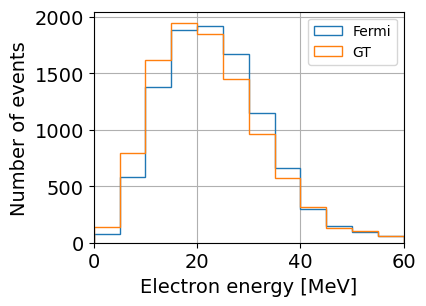

In [16]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(FermiE.PHEP4*1000, bins = np.linspace(0, 60, 13), histtype = 'step', label = 'Fermi')
ax.hist(GTE.PHEP4*1000, bins = np.linspace(0, 60, 13), histtype = 'step', label = 'GT')
ax.set_xlabel( r'Electron energy [MeV]', fontsize = 14 )
ax.set_ylabel( r'Number of events', fontsize = 14 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, 60] )
ax.legend()

ax.grid(":")

## Electron direction

In [17]:
FermiE['costh'] = (-FermiE.PHEP1+FermiE.PHEP2)/np.sqrt((FermiE.PHEP1**2+FermiE.PHEP2**2+FermiE.PHEP3**2)*2)
GTE['costh'] = (-GTE.PHEP1+GTE.PHEP2)/np.sqrt((GTE.PHEP1**2+GTE.PHEP2**2+GTE.PHEP3**2)*2)

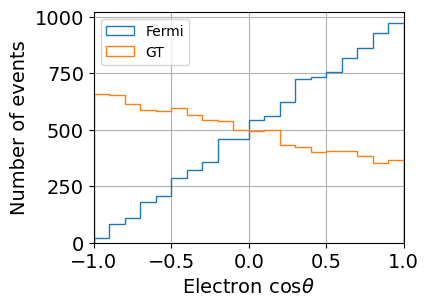

In [18]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(FermiE.costh, bins = np.linspace(-1, 1, 21), histtype = 'step', label = 'Fermi')
ax.hist(GTE.costh, bins = np.linspace(-1, 1, 21), histtype = 'step', label = 'GT')
ax.set_xlabel( r'Electron cos$\theta$', fontsize = 14 )
ax.set_ylabel( r'Number of events', fontsize = 14 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [-1, 1] )
ax.legend()

ax.grid(":")

## $\gamma$ energy

In [19]:
FermiG = FermiEvents[(FermiEvents.ISTHEP==1)&(FermiEvents.IDHEP==22)]
GTG = GTEvents[(GTEvents.ISTHEP==1)&(GTEvents.IDHEP==22)]

In [20]:
FermiG.PHEP4.max(), GTG.PHEP4.max()

(0.0027516556210594747, 0.013654164411911028)

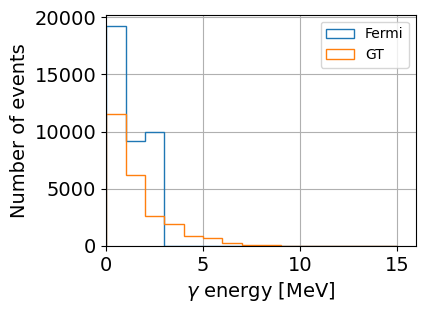

In [21]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(FermiG.PHEP4*1000, bins = np.linspace(0, 15, 16), histtype = 'step', label = 'Fermi')
ax.hist(GTG.PHEP4*1000, bins = np.linspace(0, 15, 16), histtype = 'step', label = 'GT')
ax.set_xlabel( r'$\gamma$ energy [MeV]', fontsize = 14 )
ax.set_ylabel( r'Number of events', fontsize = 14 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, 16] )
ax.legend()

ax.grid(":")